In [1]:
pip install pandas matplotlib

Dataset Head:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Dataset Info:
 None

Summary Statistics:
        total_bill         tip        size
count  244.000000  244.000000  244.00000

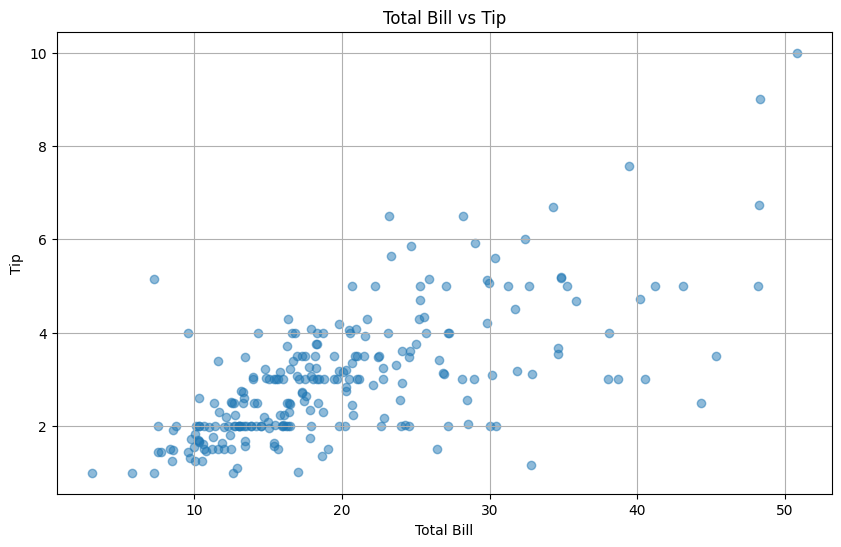

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a sample dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())
print("\nSummary Statistics:\n", data.describe())

# Analyze the relationship between total_bill and tip
plt.figure(figsize=(10, 6))
plt.scatter(data['total_bill'], data['tip'], alpha=0.5)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.savefig('total_bill_vs_tip.png')
plt.show()
